In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#將MNIST 手寫數字資料讀進來
mnist = tf.keras.datasets.mnist

# mnist 的load_data()會回傳已經先分割好的training data 和 testing data
# 並且將每個 pixel 的值從 Int 轉成 floating point 同時做normalize(這是很常見的preprocessing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


In [4]:
X_train = np.reshape(x_train,(60000,28*28))

In [5]:
X_test = np.reshape(x_test,(10000,28*28))

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(max_iter=200).fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
expected = y_test
predicted = clf.predict(X_test)

In [9]:
from sklearn import  metrics

In [10]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 957    0    1    4    1    9    4    3    1    0]
 [   0 1112    5    1    0    1    3    1   12    0]
 [   6    9  930   15   10    3   12    9   34    4]
 [   4    1   17  922    1   25    2   10   21    7]
 [   1    3    7    3  924    0    5    4    7   28]
 [   9    2    3   34    8  779   15    7   31    4]
 [   8    3    9    2    6   16  911    2    1    0]
 [   1    7   23    7    5    1    0  949    2   33]
 [   9   11    6   22    7   27   14    9  859   10]
 [   9    8    1    9   26    7    0   21    7  921]]


In [11]:
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Accuracy=0.9264


In [5]:
trainlabel=y_train

In [12]:
def bar(X_train,y_train):
    S=[]
    for k in range(10):
        index=np.where(y_train==k)
        X=X_train[index]
        X_bar=sum(X)/(X.shape[0])
        
        S.append(X_bar)
    S=np.array(S)
    return S

In [13]:
S=bar(X_train,y_train)

In [14]:
#S.shape[0]

In [15]:
#plt.gray()
#plt.matshow(S[7].reshape(28,28))

In [16]:
#P=[]
#for j in range(S.shape[0]):
#    for i in range(trainlabel.size):
#        P.append(np.exp(-0.01*(np.linalg.norm(X_train[i]-S[j]))**2))


#Phi=np.array(P).reshape(S.shape[0],trainlabel.size)

In [32]:
S=np.array([X_train[y_train==i].mean(axis=0) for i in range(10)])

In [33]:
S.shape

(10, 784)

In [130]:
X_train[0].reshape(1,784).shape

(1, 784)

In [91]:
np.sort(y_train,axis=0)

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [122]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(X_train)

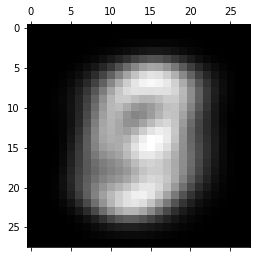

In [123]:
plt.matshow(kmeans.cluster_centers_[0].reshape(28,28))

In [37]:
from scipy.spatial import distance_matrix

In [47]:
import time

In [105]:
start = time.time()

p=distance_matrix(X_test,S)

end = time.time()
print(end-start)


1.9198672771453857


In [111]:
p[y_test==3].argmin(axis=1)

array([3, 3, 3, ..., 2, 8, 3], dtype=int64)

In [112]:
p.shape

(10000, 10)

In [106]:
(p[y_test==3].argmin(axis=1)==y_test[y_test==3]).mean()

0.805940594059406

In [125]:
np.exp(p).shape

(10000, 10)

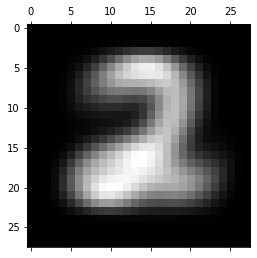

In [126]:
theta=np.ones(10)
theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
def update(qi,tol,Phi):
    updatecom=((qi/(tol))*Phi)
    updatey=(Phi)
    return(-1*updatecom+updatey)

In [859]:
theta=np.ones(10)
#i0=np.random.randint(low=1,high=len(X_train),size=1)[0]
#Phi=(distance_matrix(X_train,S))
Phi=np.exp(-0.05*(distance_matrix(X_train,S))**2)

In [1161]:
type(y_train[3])

numpy.uint8

In [1666]:
theta=np.ones(10)

for i in range(200):
    updatey=0
    i0=np.random.randint(low=1,high=len(X_train),size=1)[0]
    Phi=np.exp(-0.001*(distance_matrix(X_train[i0].reshape(1,784),S))**2)
    q=np.exp(theta*Phi)
    tol=sum(q.T)

    
    updatecom=(q/tol)*Phi
    updatey=Phi[0][y_train[i0]]
    update=(-1*updatecom+updatey)
    
    theta=theta+0.001*update
    
update    

array([[0.85525313, 0.84675198, 0.84686516, 0.85028008, 0.84890259,
        0.84976222, 0.85162401, 0.850944  , 0.84677972, 0.85018005]])

In [1667]:
#theta=np.ones(10)
#for i in range(20):
#    q=np.exp(theta*Phi)
#    tol=sum(q.T)

    
#    updatecom=sum(((q.T/tol.T).T*Phi)).reshape(1,10)
#    updatey=(sum(Phi).reshape(1,10))
#    update=(-1*updatecom+updatey)/X_train.shape[0]
#    theta=theta+0.1*update
    
#update    

In [1668]:
theta

array([[1.16920173, 1.16909007, 1.16881633, 1.1688234 , 1.1688381 ,
        1.16861702, 1.16885796, 1.16897709, 1.16871311, 1.16879111]])

In [1315]:
theta=np.ones(10)
q=np.exp(theta*Phi)
tol=sum(q.T)
q.shape
tol.shape

(1,)

In [1307]:
sum(((q.T/tol.T).T*Phi)).reshape(1,10)

array([[0.09388929, 0.08599846, 0.09610754, 0.0909094 , 0.09021999,
        0.09115807, 0.09196517, 0.09078529, 0.09242738, 0.09039512]])

In [1308]:
sum((q.T/tol.T).T).reshape(1,10)*sum(Phi).reshape(1,10)

array([[0.09388929, 0.08599846, 0.09610754, 0.0909094 , 0.09021999,
        0.09115807, 0.09196517, 0.09078529, 0.09242738, 0.09039512]])

In [1309]:
theta=np.ones(10)

In [1657]:
def Logistic_digit_pred(S,X_test,theta,i0):
    Phi=np.exp(-0.001*(distance_matrix(X_test[i0].reshape(1,784),S))**2)
    #Phi=distance_matrix(X_test[i0].reshape(1,784),S)
    q=np.exp(theta*Phi)
    tol=sum(q.T)

    return np.argmax(q/tol)

In [1658]:
X_test = np.reshape(x_test,(10000,28*28))

6

<Figure size 432x288 with 0 Axes>

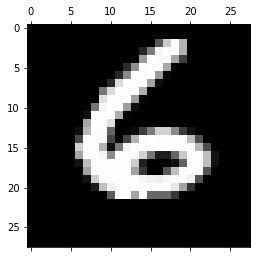

In [1669]:
i0=np.random.randint(low=1,high=len(X_test),size=1)[0]
X_test[i0]
plt.gray()
plt.matshow(X_test[i0].reshape(28,28))
y_test[i0]

In [1670]:
Logistic_digit_pred(S,X_test,theta,i0)

6

In [1671]:
A=[]
for i in range(len(y_test)):
    A.append(Logistic_digit_pred(S,X_test,theta,i))


In [1672]:
cm1 = metrics.confusion_matrix(y_test,A)
print("Confusion matrix:\n%s" % cm1)

Confusion matrix:
[[ 881    0    6    2    2   55   25    1    7    1]
 [   0 1094   10    3    0    6    3    0   19    0]
 [  20   75  777   33   30    3   23   18   50    3]
 [   4   24   25  819    1   46    8   17   54   12]
 [   1   23    2    0  815    2   16    2    9  112]
 [  13   63    2  122   22  602   27   11   13   17]
 [  20   28   21    0   30   30  828    0    1    0]
 [   2   61   20    1   19    0    0  863   13   49]
 [  14   40   11   86   13   31   14   10  717   38]
 [  17   22    7   10   83    9    1   29   17  814]]


In [1673]:
cm-cm1

array([[ 76,   0,  -5,   2,  -1, -46, -21,   2,  -6,  -1],
       [  0,  18,  -5,  -2,   0,  -5,   0,   1,  -7,   0],
       [-14, -66, 153, -18, -20,   0, -11,  -9, -16,   1],
       [  0, -23,  -8, 103,   0, -21,  -6,  -7, -33,  -5],
       [  0, -20,   5,   3, 109,  -2, -11,   2,  -2, -84],
       [ -4, -61,   1, -88, -14, 177, -12,  -4,  18, -13],
       [-12, -25, -12,   2, -24, -14,  83,   2,   0,   0],
       [ -1, -54,   3,   6, -14,   1,   0,  86, -11, -16],
       [ -5, -29,  -5, -64,  -6,  -4,   0,  -1, 142, -28],
       [ -8, -14,  -6,  -1, -57,  -2,  -1,  -8, -10, 107]], dtype=int64)

In [1674]:
Num=0

for i in range(len(y_test)):
    A=Logistic_digit_pred(S,X_test,theta,i)
    if (A-y_test[i])==0:
        Num=Num+1
    #print (A,y_test[i])

In [1675]:
Num/len(y_test)

0.821